### Hyperparameters

In [1]:
from keras.callbacks import EarlyStopping

# Stopping training when validation loss does not improve
callbacks = [EarlyStopping(monitor="val_accuracy", patience=3),
             EarlyStopping(monitor="val_loss", patience=3)]

EPOCHS = 20
BATCH_SIZE = 32

### Loading data

In [2]:
from data.norec.dataloader import load_full_dataset
from data.dataloader import load_data

# Load binary data
binary_dataset = load_full_dataset(binary=True)
binary_data = load_data(binary_dataset)

# Load multiclass data
multiclass_dataset = load_full_dataset()
multiclass_data = load_data(multiclass_dataset)

Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!
Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!


# Classifying with multiclass dataset

In [3]:
X_train = multiclass_data['X_train']
X_val = multiclass_data['X_val']
X_test = multiclass_data['X_test']
y_train = multiclass_data['y_train']
y_val = multiclass_data['y_val']
y_test = multiclass_data['y_test']
num_words = multiclass_data['num_words']
maxlen = multiclass_data['maxlen']
num_classes = multiclass_data['num_classes']
multiclass_tokenizer = multiclass_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 210)
X_val shape: (4360, 210)
X_test shape: (4351, 210)
y_train shape: (34903, 3)
y_val shape: (4360, 3)
y_test shape: (4351, 3)
num_words: 26000
maxlen: 210
num_classes: 3


In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.optimizers import adam_v2

model = Sequential()
model.add(Embedding(num_words, 100, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer=adam_v2.Adam(learning_rate=0.001), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 210, 100)          2600000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 2,617,123
Trainable params: 2,617,123
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)

Epoch 1/20
1091/1091 [==============================] - 141s 127ms/step - loss: 0.6117 - accuracy: 0.7575 - val_loss: 0.5066 - val_accuracy: 0.7920
Epoch 2/20
1091/1091 [==============================] - 151s 138ms/step - loss: 0.4087 - accuracy: 0.8343 - val_loss: 0.5188 - val_accuracy: 0.8057
Epoch 3/20
1091/1091 [==============================] - 147s 135ms/step - loss: 0.2555 - accuracy: 0.9046 - val_loss: 0.6131 - val_accuracy: 0.7929
Epoch 4/20
1091/1091 [==============================] - 155s 142ms/step - loss: 0.1444 - accuracy: 0.9484 - val_loss: 0.7823 - val_accuracy: 0.7638


In [6]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 5s 39ms/step - loss: 0.7679 - accuracy: 0.7658
Validation loss: 0.7678544521331787
Validation accuracy: 0.765800952911377


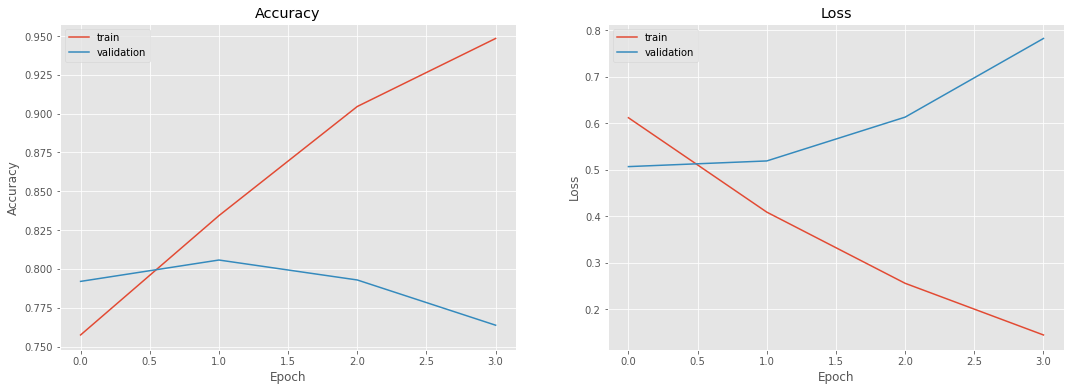

In [7]:
from utils.visualization import plot_history

plot_history(history, save=False, show=True)

# Classifying with binary dataset

In [8]:
X_train = binary_data['X_train']
X_val = binary_data['X_val']
X_test = binary_data['X_test']
y_train = binary_data['y_train']
y_val = binary_data['y_val']
y_test = binary_data['y_test']
num_words = binary_data['num_words']
maxlen = binary_data['maxlen']
num_classes = binary_data['num_classes']
binary_tokenizer = binary_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 210)
X_val shape: (4360, 210)
X_test shape: (4351, 210)
y_train shape: (34903, 2)
y_val shape: (4360, 2)
y_test shape: (4351, 2)
num_words: 26000
maxlen: 210
num_classes: 2


In [9]:
model = Sequential()
model.add(Embedding(num_words, 100, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer=adam_v2.Adam(learning_rate=0.001), metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 210, 100)          2600000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,617,090
Trainable params: 2,617,090
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)

Epoch 1/20
1091/1091 [==============================] - 160s 144ms/step - loss: 0.4312 - accuracy: 0.8065 - val_loss: 0.3883 - val_accuracy: 0.8401
Epoch 2/20
1091/1091 [==============================] - 160s 147ms/step - loss: 0.2595 - accuracy: 0.8955 - val_loss: 0.4621 - val_accuracy: 0.8411
Epoch 3/20
1091/1091 [==============================] - 184s 168ms/step - loss: 0.1539 - accuracy: 0.9421 - val_loss: 0.5150 - val_accuracy: 0.8282
Epoch 4/20
1091/1091 [==============================] - 175s 160ms/step - loss: 0.0885 - accuracy: 0.9691 - val_loss: 0.7130 - val_accuracy: 0.8362


In [11]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 6s 43ms/step - loss: 0.6685 - accuracy: 0.8393
Validation loss: 0.6685014963150024
Validation accuracy: 0.8393473029136658


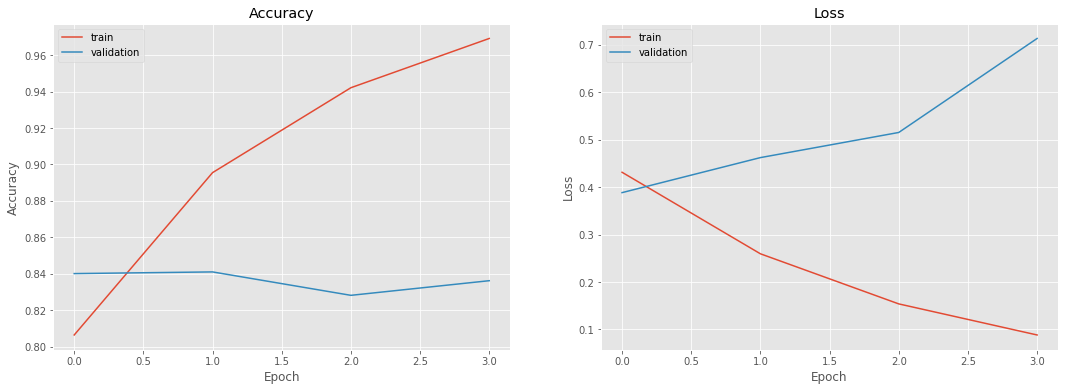

In [12]:
plot_history(history, save=False, show=True)